# tiny-YOLO 모델로 옷 분류하기

## 사용된 라이브러리

In [219]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import time


## 모델 학습시키기

- 32153개의 이미지를 이용하여 옷을 13개 카테고리로 분류하는 모델을 만들었다.
    - 32153개의 이미지를 1만회 반복하여 학습시켰다.

<1000번째 학습 중인 사진>

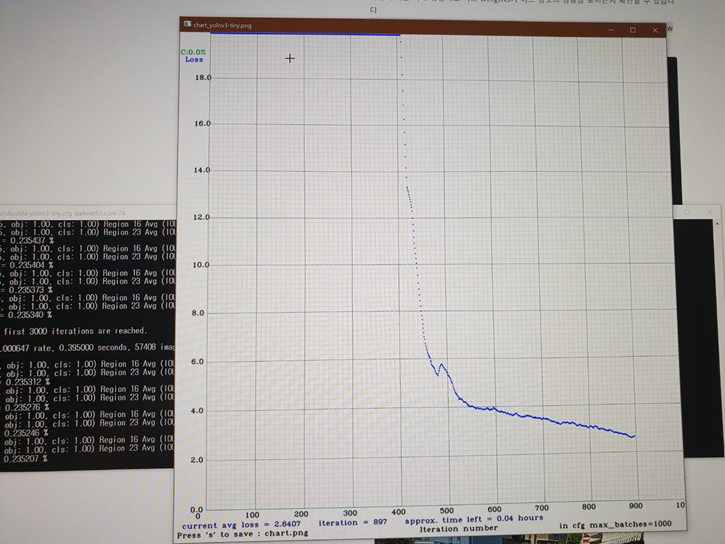


<10,000번째 학습중인 사진>

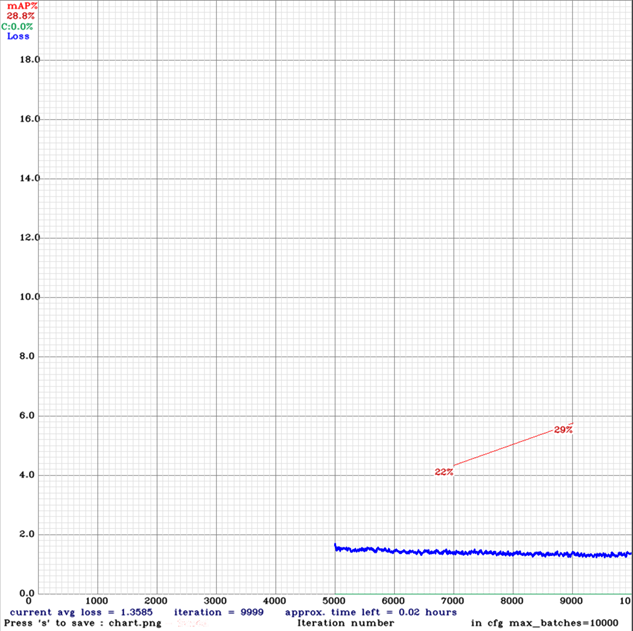

- map가 증가하는 경향을 보여서 10,000회에서 학습을 중단

## tiny-YOLO 학습된 모델 로딩

In [220]:

cfg =  "yolov3-tiny.cfg"
weight = "yolov3-tiny_10000.weights"
net = cv2.dnn.readNet(weight, cfg)
classes = []
with open("cloth.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## 이미지 가져오기

image shape: (288, 432, 3)


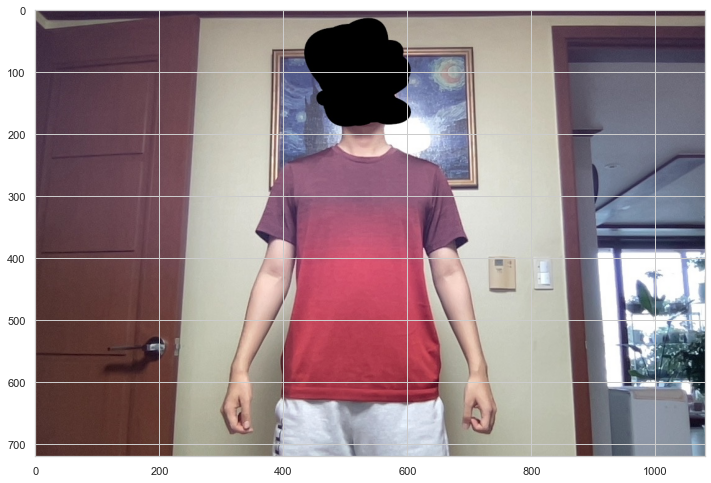

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# IMAGE_NAME = 'webcam.png'
IMAGE_NAME = 'raw_sample1_3.jpg'

src = cv2.imread(IMAGE_NAME)
img_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
img = src.copy()
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape


print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## 옷 분류 모델에 이미지 넣기

In [222]:


# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)



    # 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


            # 노이즈 제거
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


font=cv2.FONT_HERSHEY_SIMPLEX

label_list = []

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        label_list.append(label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 1, color, 3)

cv2.imwrite('result_img/' + IMAGE_NAME, img)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



## 분류된 라벨 한글로 번역하기

In [223]:
label_to_korean = { 'short_sleeved_shirt' : '짧은 소매 셔츠',
                   'long_sleeved_shirt' : '긴 소매 셔츠',
                   'short_sleeved_outwear' : '짧은 소매 겉옷 ',
                   'long_sleeved_outwear' : '긴 소매 겉옷',
                   'vest' : '조끼',
                   'sling' : '끈으로 어깨에 걸치는 옷',
                   'shorts' : '반바지',
                   'trousers' : '긴바지',
                   'skirt' : '스커트',
                   'short_sleeved_dress' : '밑단 짧은 드레스',
                   'long_sleeved_dress' : '밑단 긴 드레스',
                   'vest_dress' : '조끼 드레스',
                   'sling_dress' : '끈 드레스'
                  }

In [224]:
for label in label_list:
    print(label_to_korean[label])

짧은 소매 셔츠
반바지


image shape: (288, 432, 3)


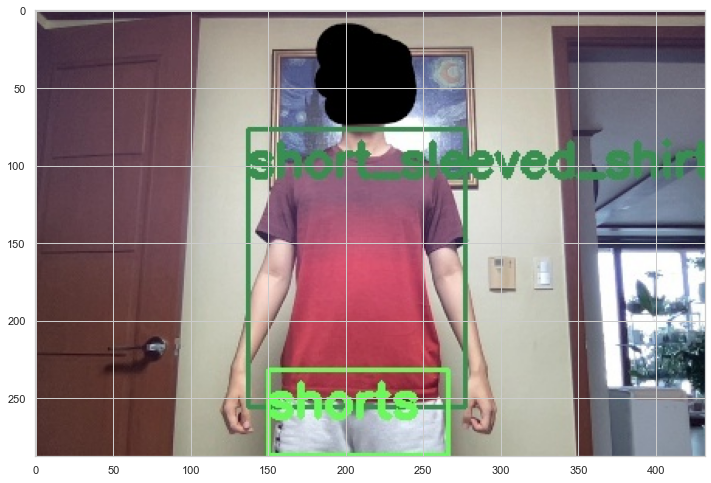

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('sample1_3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## 분류된 옷 자르기

In [226]:
import os

fname, fext = os.path.splitext(IMAGE_NAME)
rgb = []
ko_name_list = []
for i  in range(2):
    (x,y,w,h) = boxes[i]
    x = round(x*2.5)
    y = round(y*2.5)
    w = round(w*2.5)
    h = round(h*2.5)

    cropped_img = src[y:y+h,x:x+w]
    cv2.imshow("img",cropped_img)
    cv2.imwrite('result_img/' + fname+'_'+str(i+1)+fext, cropped_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


image shape: (448, 350, 3)


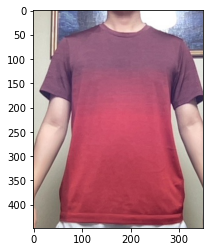

In [227]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('result_img/sample1_3_1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(4, 4))
plt.imshow(img_rgb)

# 옷 색 얻기

## 분류된 이미지 가져오기

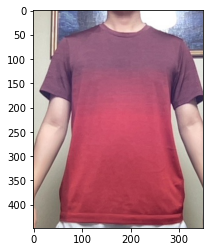

In [228]:
IMAGE_NAME = 'result_img/sample1_3_1.jpg'
im = Image.open(IMAGE_NAME)
fname, fext = os.path.splitext(IMAGE_NAME)
src = cv2.imread(IMAGE_NAME)
image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
img = src.copy()
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
plt.imshow(image)

In [229]:
im.getpixel((1,1))

(208, 206, 193)

In [230]:
rgb = []
for i in range(0,im.size[0]): # x방향 탐색
    for j in range(0,im.size[1]): # y방향 탐색
        if im.getpixel((i,j))[2] > 50:
            rgb.append(im.getpixel((i,j)))  # i,j 위치에서의 RGB 취득


In [231]:
im.getpixel((i,j))

(157, 148, 133)

## K-means klustering을 이용해

In [232]:
image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)

(156800, 3)


In [233]:
from sklearn.cluster import KMeans 
k = 5 # 예제는 5개로 나누겠습니다
kmeans = KMeans(n_clusters = k)
kmeans.fit(image)

KMeans(n_clusters=5)

## clustering 된 색 확인

In [234]:
color_list = list()

for center in kmeans.cluster_centers_:
    color_list.append([int(fnum) for fnum in center])
    print([int(fnum) for fnum in center])


[124, 52, 71]
[180, 163, 161]
[139, 99, 122]
[189, 72, 96]
[226, 214, 208]


## 색의 분포 비율

In [235]:
numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)
(hist, _) = np.histogram(kmeans.labels_, bins=numLabels)


hist = hist.astype("float")
hist /= hist.sum()

print(hist)

[0.10494898 0.12204082 0.27729592 0.35221301 0.14350128]


In [236]:

bgr = []
for i in range(0,img.shape[0]): # x방향 탐색
    for j in range(0,img.shape[1]): # y방향 탐색
            bgr.append(img[i,j])
    bb_avg = np.mean(bgr[i][0])
    gg_avg = np.mean(bgr[i][1])
    rr_avg = np.mean(bgr[i][2])


# print(bgr)
print(rr_avg, gg_avg, bb_avg)



91.0 91.0 116.0


## 색 이름 얻기(CSS3)

In [237]:
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'

In [238]:
eng_name_list = list()
for i in range(len(color_list)):
        eng_color = convert_rgb_to_names(color_list[i]).split(' ')[2]
        eng_name_list.append(eng_color)
print(eng_name_list)

['brown', 'darkgray', 'gray', 'indianred', 'gainsboro']


In [239]:
import pandas as pd
df = pd.DataFrame(hist, eng_name_list)
df

,0
brown,0.104949
darkgray,0.122041
gray,0.277296
indianred,0.352213
gainsboro,0.143501


In [240]:
color=df.loc[df[0] == max(df[0]), 0].index[0]

In [241]:
## 클러스터링으로 가장 많은 데이터를 가진 그룹
color

'indianred'

# 한글 색이름(웹크롤링으로 데이터 추출)

In [252]:
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlretrieve
from urllib.request import urlopen
options = webdriver.ChromeOptions()
options.add_argument('headless')

browser = webdriver.Chrome('chromedriver', chrome_options=options)
url = 'https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kjg5345&logNo=150112431053'
browser.maximize_window()
browser.get(url)
bs = BeautifulSoup(browser.page_source, 'lxml')


<ipython-input-252-80264981cc26>:8: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome('chromedriver', chrome_options=options)


In [243]:
a = bs.findAll('font', {'size' : '2'})

In [244]:
## 웹 크롤링으로 없는 데이터 직접 입력
ko_color = []
en_color = []
for i in range(6, 106):
    try : 
        ko_color.append(a[i].text.split()[2])
        en_color.append(a[i].text.split()[1])
    except :
        if a[i].text.split()[1] == 'gainsboro':
            ko_color.append('옅은 회색')
            en_color.append(a[i].text.split()[1])
        elif a[i].text.split()[1] == 'ornagered':
            ko_color.append('주황색')
            en_color.append(a[i].text.split()[1])
        else :
            continue
color_name = pd.DataFrame(ko_color, en_color)

In [245]:
color_name

,0
black,검정
darkslategray,어두운푸른빛회색
slategray,푸른빛회색
lightslategray,밝은푸른빛회색
dimgray,칙칙한회색
...,...
lightsalmon,밝은주황색
palevioletred,옅은제비꽃빨강
sandybrown,엷은갈색
salmon,주황색


In [246]:
df

,0
brown,0.104949
darkgray,0.122041
gray,0.277296
indianred,0.352213
gainsboro,0.143501


In [247]:

for i in df.index:
    print(color_name.loc[i == color_name.index, 0][0])

갈색
어두운회색
회색
인디언빨강
옅은 회색


In [248]:
color_one = color_name.loc[color == color_name.index, 0][0]
color_one

'인디언빨강'

# TTS

In [249]:
a = []
for label in label_list:
    a.append(label_to_korean[label])
a[0]

'짧은 소매 셔츠'

In [250]:
Label = '   옷은 ' + a[0] + '    이고     ' + '    색상은' + color_one + '  입니다'

In [251]:
from gtts import gTTS

tts = gTTS(text=Label, lang='ko')
tts.save("Label_Color.mp3")